In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [6]:
# Load the dataset
file_path = "/content/Credit Card Customer Data.csv"
credit_card_data = pd.read_csv(file_path)

# Descriptive Statistics
desc_stats = credit_card_data.describe()

# Display the first few rows of the dataset
credit_card_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
# Checking for missing values
missing_values = credit_card_data.isnull().sum()

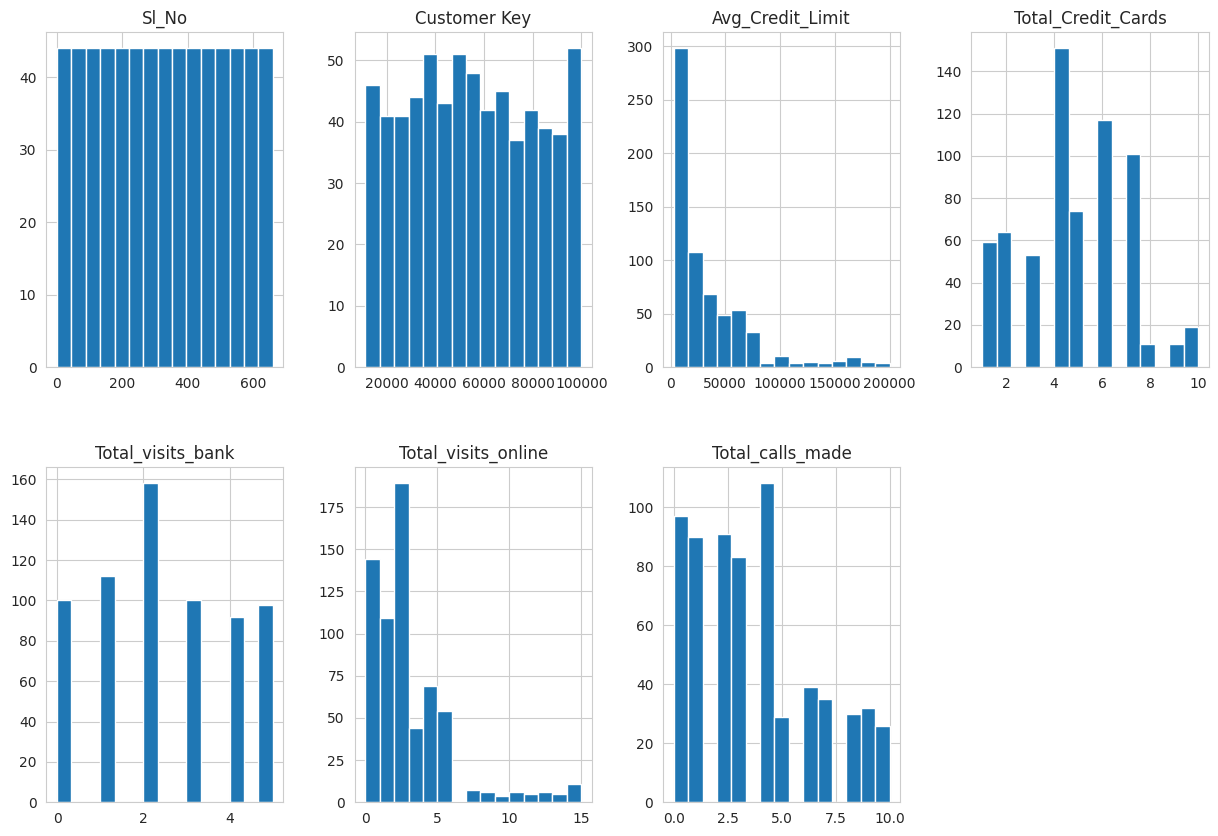

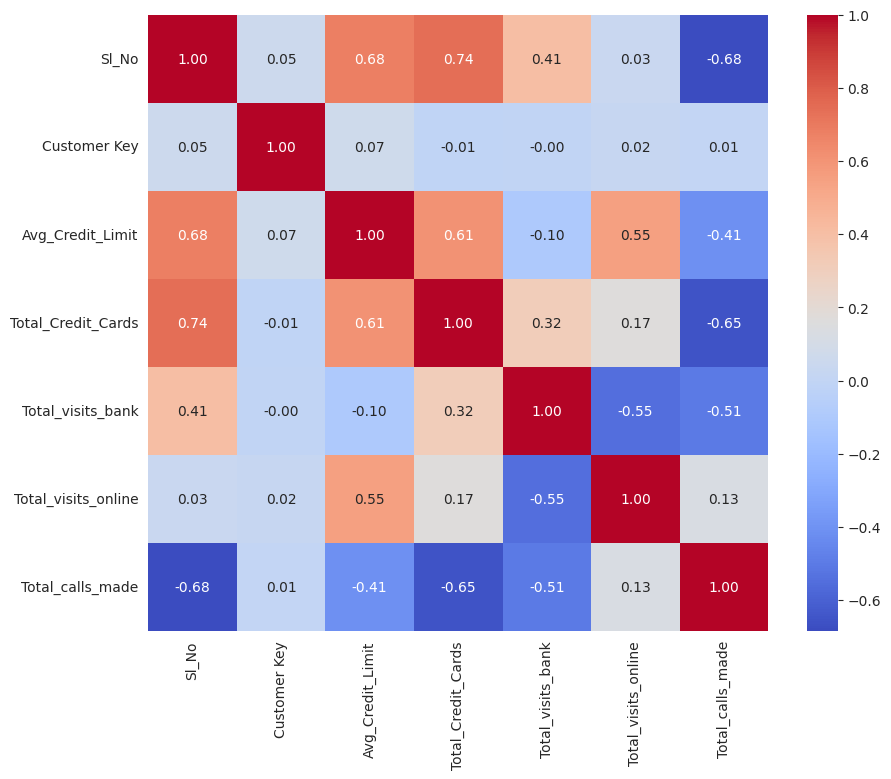

In [8]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting histograms for numerical features
credit_card_data.hist(bins=15, figsize=(15, 10), layout=(2, 4))

# Correlation matrix
correlation_matrix = credit_card_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [10]:
# Standardizing the data
# Excluding 'Sl_No' and 'Customer Key' as they are identifiers
features = credit_card_data.drop(['Sl_No', 'Customer Key'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Showing the first few rows of the scaled data
pd.DataFrame(scaled_features, columns=features.columns).head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


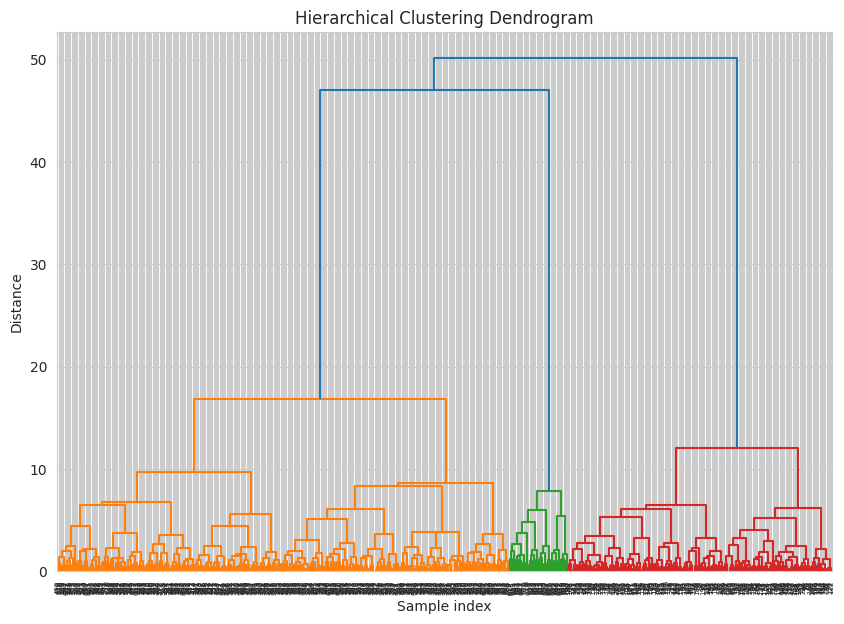

In [11]:
# Using the linkage method 'ward' for hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [13]:
# Fitting the Agglomerative Clustering model
# Assuming 3 clusters (this can be adjusted based on the dendrogram)
n_clusters = 3
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
hierarchical_model.fit(scaled_features)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [16]:
# Displaying the cluster labels for the first few samples
cluster_labels = hierarchical_model.labels_
pd.DataFrame(cluster_labels, columns=['Cluster Label']).head()

,Cluster Label
0,0
1,1
2,0
3,0
4,2


In [17]:
# Adding the cluster labels to the original data for interpretation
credit_card_data['Cluster'] = hierarchical_model.labels_

In [18]:
# Model Evaluation and Interpretation

# Grouping the data by cluster and calculating mean values for each feature
cluster_characteristics = credit_card_data.groupby('Cluster').mean()

# Count of customers in each cluster
cluster_counts = credit_card_data['Cluster'].value_counts()

In [19]:
# Displaying the cluster characteristics and counts
print(cluster_characteristics)
print(cluster_counts)

              Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Cluster                                                                   
0        417.862338  54895.745455      33851.948052            5.516883   
1        118.617778  55213.568889      12151.111111            2.422222   
2        611.280000  56708.760000     141040.000000            8.740000   

         Total_visits_bank  Total_visits_online  Total_calls_made  
Cluster                                                            
0                 3.493506             0.979221          1.994805  
1                 0.937778             3.546667          6.857778  
2                 0.600000            10.900000          1.080000  
0    385
1    225
2     50
Name: Cluster, dtype: int64
